# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, classification_report,roc_auc_score,roc_curve,mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

# Task 01

In [3]:
#Loading 

dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Information: 
 None


Statistica Summary: 
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.6

<Figure size 1000x800 with 0 Axes>

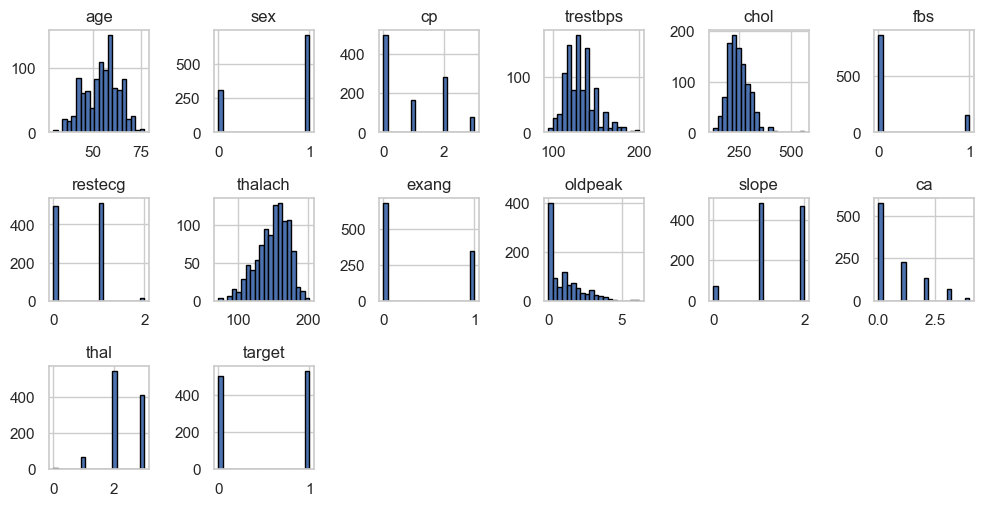


Target Class Distribution:
1    526
0    499
Name: target, dtype: int64


In [4]:
#A (Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
dataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()

# Target Class Distribution
print("\nTarget Class Distribution:")
print(dataset['target'].value_counts())

In [5]:
if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)
#Here No Categirical Feature Exists!!
print(dataset)

No missing values in the dataset.

Duplicate Records:
 723
Dataset After Removing Duplicates:       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
#SPlitting
x = dataset.drop('target', axis = 1)
y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

trainAccuracies = []
testAccuracies = []

In [27]:
print("=================PART B (PENALTY = L1)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear')

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART B (PENALTY = L1)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [28]:
print("=================PART C (PENALTY = L2)=================\n")
LR = LogisticRegression(penalty='l2',solver='liblinear')

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")
trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART C (PENALTY = L2)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [29]:
print("=================PART D (PENALTY = elasticnet)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART D (PENALTY = elasticnet)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.84


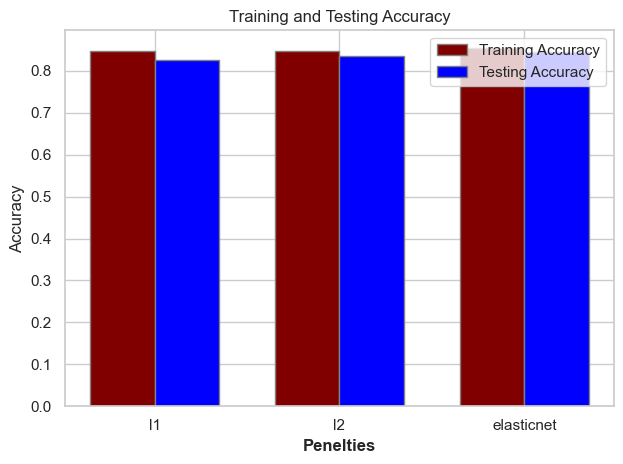

In [32]:
#E

LR_Panelties = ['l1','l2','elasticnet']
bar_width = 0.35

r1 = np.arange(len(LR_Panelties))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='maroon', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='blue', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], LR_Panelties)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#F

# I had encountered error while applyng penalities without defining solver, after solver defination error was resolved!!
# I adjusted max_iter parameter to remove warning (Was not Converging) and improved accuracy!!

In [ ]:
#G

#I used solver additionally!! without defining solver there was occuring an error!!

# Task 02

In [36]:
irisDataset = pd.read_csv('Iris.csv')
irisDataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
X = irisDataset.drop('Species',axis=1)
Y = irisDataset['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.6, random_state=42)

trainAccuracies = []
testAccuracies = []

In [89]:
print("=================(Solver = saga)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = saga)=================

Training Accuracy : 0.93
Testing Accuracy  : 0.96


In [90]:
print("=================(Solver = sag)=================\n")
LR = LogisticRegression(penalty='l2',solver='sag',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = sag)=================

Training Accuracy : 0.97
Testing Accuracy  : 0.97


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [91]:
print("=================(Solver = newton-cholesky)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cholesky',l1_ratio=0.3,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cholesky)=================

Training Accuracy : 0.98
Testing Accuracy  : 1.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [92]:
print("=================(Solver = newton-cg)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cg',l1_ratio=0.3,max_iter=1000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cg)=================

Training Accuracy : 1.0
Testing Accuracy  : 1.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [93]:
print("=================(Solver = liblinear)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = liblinear)=================

Training Accuracy : 0.9
Testing Accuracy  : 0.93


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [94]:
print("=================(Solver = lbfgs)=================\n")
LR = LogisticRegression(penalty='l2',solver='lbfgs',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = lbfgs)=================

Training Accuracy : 1.0
Testing Accuracy  : 1.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


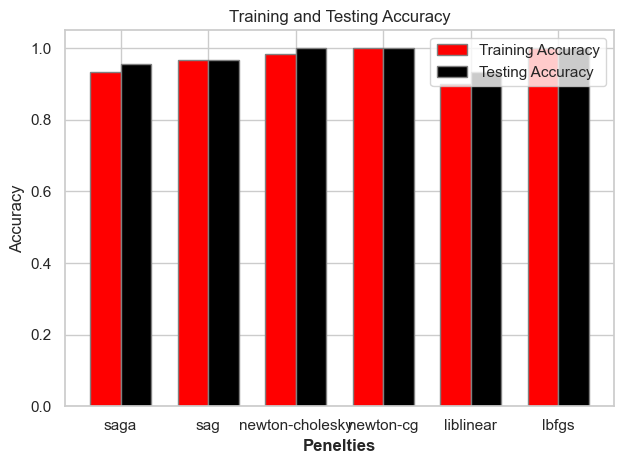

In [101]:
solvers = ['saga','sag','newton-cholesky','newton-cg','liblinear','lbfgs']

bar_width = 0.35

r1 = np.arange(len(solvers))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='red', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='black', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], solvers)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#lbfgs,newton-cg and sag solvers performing best in my case!!

In [103]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [104]:
x = dataset.drop('target', axis = 1)
y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

trainAccuracies = []
testAccuracies = []

In [105]:
print("=================(Solver = saga)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = saga)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.84


In [106]:
print("=================(Solver = sag)=================\n")
LR = LogisticRegression(penalty='l2',solver='sag',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = sag)=================



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [107]:
print("=================(Solver = newton-cholesky)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cholesky',l1_ratio=0.3,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cholesky)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [108]:
print("=================(Solver = newton-cg)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cg',l1_ratio=0.3,max_iter=1000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cg)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [109]:
print("=================(Solver = liblinear)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = liblinear)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [110]:
print("=================(Solver = lbfgs)=================\n")
LR = LogisticRegression(penalty='l2',solver='lbfgs',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = lbfgs)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


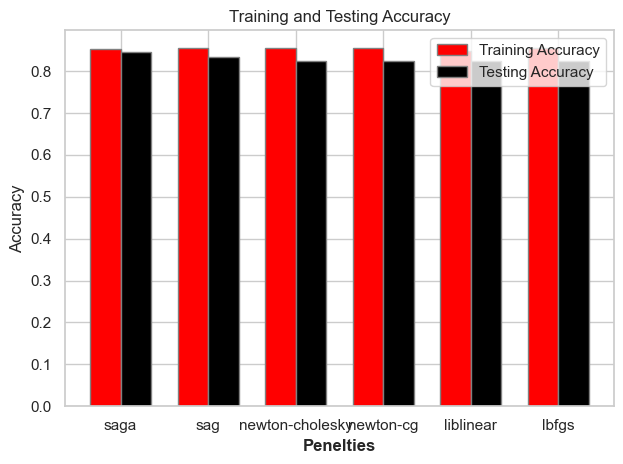

In [111]:
solvers = ['saga','sag','newton-cholesky','newton-cg','liblinear','lbfgs']

bar_width = 0.35

r1 = np.arange(len(solvers))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='red', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='black', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], solvers)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Task 03